In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

In [2]:
iris = datasets.load_iris()

In [3]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100, verbose=False, fit_intercept=True):
        self.lr = lr
        self.theta = None
        self.verbose = verbose
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    @staticmethod
    def __intercept(data):
        intercept = np.ones((data.shape[0], 1))
        return np.concatenate((intercept, data), axis=1)

    @staticmethod
    def __sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def __loss(h, y_hat):
        return (-y_hat * np.log(h) - (1 - y_hat) * np.log(1 - h)).mean()

    def fit(self, data, target):
        if self.fit_intercept:
            data = self.__intercept(data)

        self.theta = np.zeros((data.shape[1], 1))

        for _ in range(self.num_iter):
            z = np.dot(data, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, target)
            gradient_d = np.dot(data.T, (h - target)) / target.shape[0]
            self.theta -= (self.lr * gradient_d)

            if self.verbose:
                print(f"Loss: {loss}")

    def __predict_probability(self, data):
        return self.__sigmoid(np.dot(self.__intercept(data), self.theta))

    def predict(self, test):
        return self.__predict_probability(test).round()

In [4]:
X = iris.data[:100, :]
y = iris.target.reshape(150, 1)[:100, :]

In [5]:
x_train = np.vstack((X[:32, :], X[50:82, :]))
x_test = np.vstack((X[32:50, :], X[82:100, :]))
y_train = np.vstack((y[:32, :], y[50:82, :]))
y_test = np.vstack((y[32:50, :], y[82:100, :]))

In [6]:
def accuracy(prediction, output):
    bool_elem = (prediction == output)
    elem = bool_elem.size
    return (100 / elem) * bool_elem.ravel().tolist().count(True)


def data_visualization(data, target, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.scatter(data[:, :1][target == 0], data[:, 1:2][target == 0], color='b', label='0')
    plt.scatter(data[:, :1][target == 1], data[:, 1:2][target == 1], color='r', label='1')
    plt.legend()

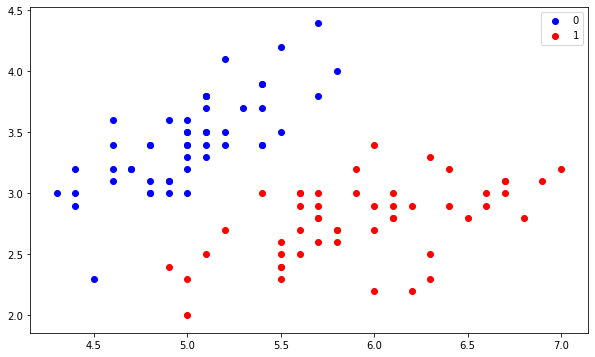

In [7]:
data_visualization(X, y)

In [8]:
model = LogisticRegression(num_iter=50)

In [9]:
# Time Measurement

%time model.fit(x_train, y_train)

CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 9.62 ms


In [10]:
# Accuracy Measurement in %

prediction = model.predict(x_test)
print(f"Accuracy: {accuracy(prediction, y_test)}")

Accuracy: 100.0


In [11]:
# Comparing with the scikit learn Logistic Regression class

sk_model = linear_model.LogisticRegression()

%time sk_model.fit(x_train, y_train)

CPU times: user 20.9 ms, sys: 159 µs, total: 21 ms
Wall time: 20.1 ms


/home/olalekan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Comparing with the scikit learn Logistic Regression class
# Accuracy Measurement in %

prediction = sk_model.predict(x_test)
print(f"Accuracy: {accuracy(prediction, y_test)}")

Accuracy: 50.0
